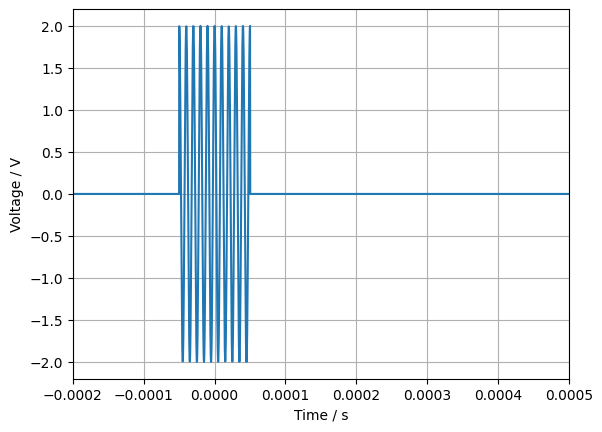

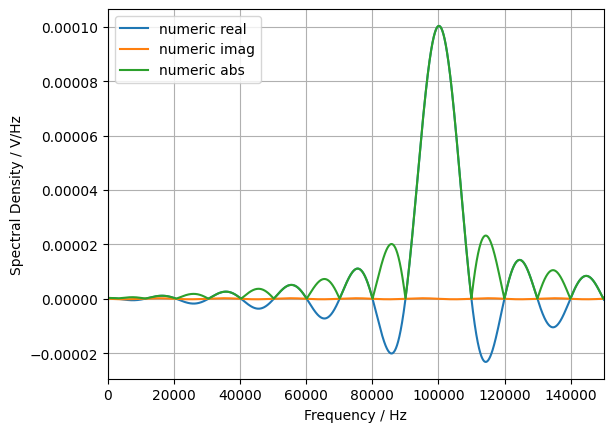

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from fourier import *

tau = 1e-4
carrierfreq = 1e5
risetime = tau/100
# set up time domain
Nt = 200000
t_min = -2*tau
t_max = 1000.*tau/2
t, timestep = np.linspace(t_min, t_max, Nt, retstep = True)

# Voltage in time domain
u_0 = 2
t0 = 0*tau
# rectangular pulse
u_t = rectangle(t, u_0, tau, t0)
# puls modulated carrier
u_t = u_t * np.cos(2*np.pi*carrierfreq*t)
# trapzoid pulse
#u_t = trapzoid(t, u_0, tau, risetime, t0)

# plot time domain
plt.plot(t, u_t)
plt.xlabel('Time / s')
plt.ylabel('Voltage / V')
plt.grid()
plt.xlim(-2*tau, 5*tau)
plt.show()


# setup freq array
freqs = get_freqs(Nt, timestep)
# calc omega from freq
omega = 2*np.pi*freqs

# analytical Fourier Transform
U_th = FT_trapzoid(freqs, u_0, tau, risetime, t0)

# Perform numerical Fourier Transform
freqs, U_freq = fourier(u_t, t_min, t_max, Nt)

# plot Fourier Transform
#plt.plot(freqs, U_th.real, label='analytical real')
#plt.plot(freqs, U_th.imag, label='analytical imag')
#plt.plot(freqs, np.abs(U_th), label='analytical abs')
plt.plot(freqs, U_freq.real, label='numeric real')
plt.plot(freqs, U_freq.imag, label='numeric imag')
plt.plot(freqs, np.abs(U_freq), label='numeric abs')
plt.grid()
plt.xlim(0, 0.15e6)
plt.xlabel('Frequency / Hz')
plt.ylabel('Spectral Density / V/Hz')
plt.legend()
plt.show()



